<a href="https://colab.research.google.com/github/SohailaDiab/365-Days-of-AI/blob/main/Week2_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value')

# Imports

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Dataset

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

In [24]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# EDA

>Look at the median_house_value variable. Does it have a long tail?


In [25]:
df.shape

(20640, 10)

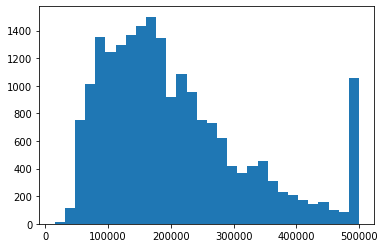

In [26]:
plt.hist(df['median_house_value'], bins=30);

We can see that `median_house_value`'s distribution is **right skewed**, with an outlier at the very end.

# Features

For the rest of the homework, you'll need to use only these columns:

*   'latitude',
*   'longitude',
*   'housing_median_age',
* 'total_rooms',
* 'total_bedrooms',
* 'population',
* 'households',
* 'median_income',
* 'median_house_value'






In [27]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [28]:
# Drop `ocean_proximity` column
del df['ocean_proximity']

# Question 1
Find a feature with missing values. How many missing values does it have?

In [29]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

`total_bedrooms` has **207** missing values.

# Question 2
What's the median (50% percentile) for variable 'population'?


In [30]:
df['population'].median()

1166.0

The median for `population` is **1166**



---






# Split the data

* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [31]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## Shuffle

In [32]:
# Shuffle the initial dataset, use seed 42.
np.random.seed(42)

# A way of doing it (however, the order changes every time)
# df = df.sample(frac=1).reset_index(drop=True)

# Generate the indicies and shuffle them
n = len(df)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx].reset_index(drop=True)

### Prepare Feature Matrix X

In [33]:
# Prepare feature matrix

def prepare_X(df, fill_zeros=False, fill_mean=False):
  # This function should not modify the original df we have, 
  # so we will work with a copy
  df = df.copy()

  # Fill NaNs with 0 if True
  if fill_zeros:
    df = df.fillna(0)
  # Fill NaNs with mean if True
  if fill_mean:
    mean = df['total_bedrooms'].mean()
    df = df.fillna(mean)

  # Extracting the feature matrix np array
  X = df.values
  return X

## Split into X and y

In [34]:
# Split data into X (without labels) and y (labels)
X = df_shuffled.iloc[:, :df.shape[1]-1]
y = df_shuffled.iloc[:, -1:]

## Apply log transformation to y `median_house_value`

In [35]:
y = np.log1p(y)

In [36]:
y.describe()

,median_house_value
count,20640.000000
mean,12.084891
std,0.569131
min,9.615805
25%,11.691916
50%,12.099050
75%,12.486451
max,13.122367


## Split data into train, test, validation
- train -> 60%
- validation -> 20%
- test -> 20%

In [37]:
# Split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, shuffle=False)

# Split the remaining dataset into validation and testing (50 50)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,  y_rem, test_size=0.5, shuffle=False)

y_train, y_valid, y_test = y_train.values, y_valid.values, y_test.values 

In [38]:
print(X_train.shape), print(y_train.shape)
print()
print(X_valid.shape), print(y_valid.shape)
print()
print(X_test.shape), print(y_test.shape)

(12384, 8)
(12384, 1)

(4128, 8)
(4128, 1)

(4128, 8)
(4128, 1)


(None, None)

# Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good


### Linear Regression Function

In [39]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]

### Evaluation function (RMSE)

In [40]:
def rmse(y, y_pred):
  ''' 
    Find the RMSE (Root Mean Squared Error)

    input:
      y: actual values
      y_pred: prediction
    output:
      root mean squared error
  '''
  se = (y - y_pred) ** 2
  mse = se.mean()
  
  return np.sqrt(mse)

## Option 1: Fill Nulls with 0

In [41]:
X_train_0 = prepare_X(X_train, fill_zeros=True)

In [42]:
w0, w = train_linear_regression(X_train_0, y_train)
print('Bias: ', w0)
print('Weights: ', w)

Bias:  [-11.68697524]
Weights:  [[-2.76255120e-01]
 [-2.82087184e-01]
 [ 2.91329621e-03]
 [-8.64531514e-06]
 [ 1.50811922e-04]
 [-2.08205659e-04]
 [ 5.69546573e-04]
 [ 1.71308139e-01]]


In [43]:
# Predict
y_pred = w0 + X_train_0.dot(w)

# Evaluate with RMSE
round(rmse(y_train, y_pred), 2)

0.34

## Option 2: Fill Nulls with mean

In [44]:
X_train_mean = prepare_X(X_train, fill_mean=True)

In [45]:
w0, w = train_linear_regression(X_train_mean, y_train)
print('Bias: ', w0)
print('Weights: ', w)

Bias:  [-11.75959087]
Weights:  [[-2.76809637e-01]
 [-2.82182103e-01]
 [ 2.93033801e-03]
 [-1.48543785e-05]
 [ 2.48054046e-04]
 [-2.03763456e-04]
 [ 4.87004092e-04]
 [ 1.73086593e-01]]


In [46]:
# Predict
y_pred = w0 + X_train_mean.dot(w)

# Evaluate with RMSE
round(rmse(y_train, y_pred), 2)

0.34

**Fill nulls with 0:**

RMSE = 0.34

**Fill nulls with mean:**

RMSE = 0.34

> They are both equally good

# Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:
- 0
- 0.000001
- 0.001
- 0.0001

## LR Regularized Function

In [47]:
def train_linear_regression_reg(X, y, r=0.001):
  '''
    inputs:
      X : Feature matrix
      y : Target values
      r : Regularization parameter

    output:
      bias 
      vector of weights
  '''
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  # Regularization 
  XTX = XTX + r*np.eye(XTX.shape[0])
  
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]

In [48]:
X_train_0 = prepare_X(X_train, fill_zeros=True)

In [49]:
rs = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for reg in rs:
  w0, w = train_linear_regression_reg(X_train_0, y_train, r=reg)

  y_val_pred = w0 + prepare_X(X_valid).dot(w)

  error = round(rmse(y_valid, y_val_pred), 2)

  print(f'r: {reg},     w0: {w0},     RMSE: {error}')
  print('---------------------------------------------------------------')

r: 0,     w0: [-11.68697524],     RMSE: 0.33
---------------------------------------------------------------
r: 1e-06,     w0: [-11.68695918],     RMSE: 0.33
---------------------------------------------------------------
r: 0.0001,     w0: [-11.68536887],     RMSE: 0.33
---------------------------------------------------------------
r: 0.001,     w0: [-11.67093132],     RMSE: 0.33
---------------------------------------------------------------
r: 0.01,     w0: [-11.52849359],     RMSE: 0.33
---------------------------------------------------------------
r: 0.1,     w0: [-10.27450028],     RMSE: 0.33
---------------------------------------------------------------
r: 1,     w0: [-4.9204809],     RMSE: 0.33
---------------------------------------------------------------
r: 5,     w0: [-1.48209575],     RMSE: 0.34
---------------------------------------------------------------
r: 10,     w0: [-0.78993118],     RMSE: 0.34
---------------------------------------------------------------


In [50]:
y_valid

array([[11.4414402 ],
       [12.15162174],
       [12.74081302],
       ...,
       [11.87965667],
       [11.9492495 ],
       [11.97540713]])

In [51]:
y_val_pred

array([[11.44695188],
       [12.09616664],
       [12.5672947 ],
       ...,
       [11.80166401],
       [12.18742628],
       [12.22333282]])

> The best regularization parameter is 0.

# Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

> Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

**Options:**

- 0.16
- 0.00005
- 0.005
- 0.15555

In [59]:
seed_vals = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for seed_val in seed_vals:
  # Set seed
  np.random.seed(seed_val)
  # Shuffle dataset
  n = len(df)
  idx = np.arange(n)
  np.random.shuffle(idx)

  df_shuffled = df.iloc[idx].reset_index(drop=True)

  # Split data into X (without labels) and y (labels)
  X = df_shuffled.iloc[:, :df.shape[1]-1]
  y = df_shuffled.iloc[:, -1:]

  # Apply log transformation
  y = np.log1p(y)

  # Split into train, validation, test (60, 20, 20)
  X_train, X_excess, y_train, y_excess = train_test_split(X, y, train_size=0.6, shuffle=False)
  X_valid, X_test, y_valid, y_test = train_test_split(X_excess, y_excess, train_size=0.5, shuffle=False)
  
  # Turn y into array
  y_train, y_valid, y_test = y_train.values, y_valid.values, y_test.values 

  # Train 
  w0, w = train_linear_regression(prepare_X(X_train, fill_zeros=True), y_train)
  # Predict on validation
  y_pred_val = w0 + prepare_X(X_valid, fill_zeros=True).dot(w)
  # Evaluate with RMSE
  errors = rmse(y_valid, y_pred_val)
  scores.append(errors)

  print(f'Seed: {seed_val},         w0: {w0},          RMSE:{errors}')
  print('------------------------------------------------------------------------')

Seed: 0,         w0: [-11.90038214],          RMSE:0.33884304805312054
------------------------------------------------------------------------
Seed: 1,         w0: [-11.73275737],          RMSE:0.3362387255956152
------------------------------------------------------------------------
Seed: 2,         w0: [-11.80672936],          RMSE:0.3320912318841953
------------------------------------------------------------------------
Seed: 3,         w0: [-11.58790035],          RMSE:0.34051536090333206
------------------------------------------------------------------------
Seed: 4,         w0: [-11.38947059],          RMSE:0.3389024066572496
------------------------------------------------------------------------
Seed: 5,         w0: [-11.44711428],          RMSE:0.3434866725718243
------------------------------------------------------------------------
Seed: 6,         w0: [-11.37051635],          RMSE:0.3451980953099226
----------------------------------------------------------------------

In [60]:
np.round(np.std(scores),3)

0.004

> The standard deviation is approx. 0.005

# Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

**Options:**

- 0.35
- 0.135
- 0.450
- 0.245

In [64]:
# Set seed
np.random.seed(9)
# Shuffle dataset
n = len(df)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx].reset_index(drop=True)

# Split data into X (without labels) and y (labels)
X = df_shuffled.iloc[:, :df.shape[1]-1]
y = df_shuffled.iloc[:, -1:]

# Apply log transformation
y = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

# Turn y into array
y_train, y_test = y_train.values, y_test.values 

# Train 
w0, w = train_linear_regression_reg(prepare_X(X_train, fill_zeros=True), y_train, r=0.001)

# Predict on validation
y_pred_train = w0 + prepare_X(X_train, fill_zeros=True).dot(w)

# Evaluate with RMSE
rmse(y_train, y_pred_train)

0.3397763880121206

> Answer: RMSE is about 0.35